# Final Report 
#### ID1 - 206094278, ID2-205926660

In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true;
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw
code."></form>''')

In [2]:
import numpy as np  # a module for working with numerical array 
import pandas as pd  # a module for working with data-frames
from matplotlib import pyplot as plt
import random
import statsmodels.api as sm
from sklearn import preprocessing
import scipy as sc
np.set_printoptions(suppress=True)
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'notebook'



from IPython.display import display_html
import sklearn
from sklearn.decomposition import PCA
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn import preprocessing
import scipy.stats as stats

In [3]:
df_2020_raw = pd.read_csv("votes per city 2020.csv", encoding = 'iso-8859-8', index_col='שם ישוב')
df_2020 = df_2020_raw.drop('סמל ועדה', axis=1)
df_2020 = df_2020[df_2020.columns[5:-1]]
df_2020_no_duble = df_2020.drop('מעטפות חיצוניות')

# Introduction
<br> Whilst the law in Israel orders elections to be held every 4 years, The elections for the 21st, 22nd and the 23rd Knesset have all been conducted in a period time of less than one calender year. Thus creating a confusing situation for both the voters and the parties, and more generally the country that was dragged into political and economical stagnation, with no budget (yet to this very day) or certainty for the future. <br>
In the campaign prospective, this was also a rather confusing year - parties tried both negative and positive campaigns, and tried a lot of different approaches in order to convince voters for their support. <br> <br>

### The system
Since Israel's political system is a parliamentary democracy, the representation of a party, and derivetively a segment in the population, is calculated as it's percent of the eligible votes, i.e the "kosher" votes, as a fixed number of votes which is calculated out of the "kosher" votes every election is worth 1 "mandate", summing all of "kosher" votes ends up in 120 mandates, with the exception of the threshold, the "ahuz hasima". This means that if a party didn't get more than or equal to 3.25% the votes, it won't count and the party will get 0 mandates (even if it had the number of votes equal to 3 mandates)  <br><br>


### Things to consider while analyzing the results
1. The parties are not the same in every election: there were many merges and splittings.
2. Throughout the paper, in most cases we will address only the 8 biggest parties, which went through the threshold.

### Mathematical notation
The kosher votes:
* $ N \in\mathbb{R}_{CxK}$ - the data space, with C cities and K parties
* $\sum_{i}\sum_{j}n_{ij} $ - Number of all the kosher votes, similarly $n_{ij}$ - total votes for party j in town i
* $\sum_{j}n_{ij}$ - Number of all the kosher votes in the i town     

All of the eligible voters: <br>
Define $\tilde{n_{ij}}$ as the number of <b>supporters</b> for party j in town i meaning that if all of people who are allowed to voted had voted, would be the number of votes this party would get in this town.<br>
Similarly, define $\sum_{i}\sum_{j}\tilde{n_{ij}}$ as all of the eligible voters, meaning "baaley zchut bechira - <b>bzb</b>"

Finally, define the support percent of a certain party, $v_{ij} = \frac{n_{ij}}{\tilde{n_{ij}}}$, represting the probability that a supporter for party j to vote in the election.

### The data
Throughout the paper we used the election results, containing the number of kosher votes for every party, organized by town (city) or by "Kalpi" (voting ballots) which are two <b>different</b> datasets, and so does the number of the disqualified votes and the number of eligible voters for each place. <br>
Following the two datasets, we used also the socio-economic data set, scaling each city in the country by it's economic resilience, thus containing interesting and useful information while analyzing the data, discovering voting trends based on economic status. <br>
Moreover, in order to deepen our analysis we also used a geographical dataset, which could indicate a location trend.<br><br>
The pick of the data sets of based on the need of the question, each one contained useful information for other purposes and perspective. <br><br>

### Adjustments
For the matter of analyzing the data, we ommited the double votes "city"/"kalpi", because we it's not possible associate them to a certain city and distablized the results estimations. Moreover, we ommited the serial numbers, since they do not contain information, other than for logistic use of the central vote comittee, yet we did use them when we tried to effectively filter the data or compare two elections and match one kalpi to another.

### The analysis made

Since our IDs are 205926660 and 206094278 the modulo of the serial digits is 0, therefore we conducted a deep analysis for the "Likud" party, throughout the three elections, containing different trends and scenarios, including vote shifts and socioligical and economical parameters.<br>
We hope you will find this paper usefull.


# The "Likud" - a quick breif

### Formation
1. 21st Knesset - the party ran as one party, no merges, same as the 20th elections.<br><br>
2. 22nd Knesset - due to "Kulanu"'s poor results in the 21st elections, there was a merge in which the "Likud" merged with "Kulanu", but since most of "Kulanu" voters aren't from the same electorate, combined with the decision of head of "Kulanu", Moshe Kachlon to retire, failed to add mandates, meaning that "Likud" sort of 'absorbed' "Kulanu" with no signinficant growth in mandates but with 3 representitives of "Kulanu".<br><br>
3. 23rd Knesset - the party continued with the previous list, including the 3 members from "Kulanu"<br>

### Things to consider
* The Likud has traditionally been the ruling party, thus effecting the usual trends and movements resulting with a solid kernel of voters, with almost no transformations to other parties.
* Having said that, much of the Likud campaign focuses on the voting percent, meaning that the party believes that high percent of the population is a Likud supporter, so high voting percent --> more mandates.
* In this article we shall not refer to the Likud chairman and the Prime minister of Israel Benjamin Netanyahu legal affairs, because it's effect remain unclear to this day, and is moreover a polarizing topic of debate in the Israeli community

### Results in the 3 elections:.

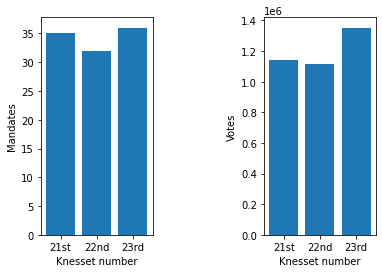

In [4]:
fig, axs = plt.subplots(1,2)
plt.subplots_adjust(hspace=2,wspace =1)
knesset = ['21st', '22nd', '23rd']
mandates = [35,32,36]
number_of_votes = [1140370,1113617,1352449]

axs[0].set_ylabel('Mandates')
axs[0].set_xlabel('Knesset number')
axs[0].bar(knesset, mandates)
axs[1].set_ylabel('Votes')
axs[1].set_xlabel('Knesset number')
axs[1].bar(knesset,number_of_votes)
plt.show()

#### Artical C

In [5]:
votes_per_ballots2020 = pd.read_csv("votes per ballot 2020.csv", encoding = 'iso-8859-8',index_col="שם ישוב")
votes_per_ballots_likud = votes_per_ballots2020.loc[:,["בזב","מצביעים","פסולים","כשרים","מחל"]]
p = votes_per_ballots_likud.loc[:,"מחל"].sum()/(votes_per_ballots_likud.loc[:,"כשרים"].sum())
v_i = votes_per_ballots2020.loc[:,"כשרים"].div(votes_per_ballots2020.loc[:,"בזב"])
n_ij = votes_per_ballots_likud.loc[:,"מחל"].div(v_i)
q_hat = sum(n_ij)/(votes_per_ballots2020.loc[:,"בזב"].sum())

In [6]:
# estimator of voteting rate in potetial voters
print("Estimation of voteing rate from supporters"+" "+str(round(votes_per_ballots_likud.loc[:,"מחל"].sum()/sum(n_ij),3)*100)+"%")

Estimation of voteing rate from supporters 70.8%


In [7]:
print("Estimation of voteing rate if every one will vote"+" "+str(round(q_hat,4)*100)+"%")
print("Actual voteing rate for the party"+" "+str(round(p,7)*100)+"%")
votes_per_ballots2020 =votes_per_ballots2020.drop("מעטפות חיצוניות")
votes_per_ballots_likud=votes_per_ballots_likud.drop("מעטפות חיצוניות")

Estimation of voteing rate if every one will vote 29.59%
Actual voteing rate for the party 29.46472%


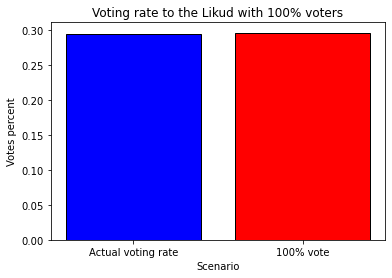

In [8]:
fig,ax = plt.subplots()
ax.bar(np.arange(2),[p,q_hat], color=['b',"r"],edgecolor ="black")
ax.set_ylabel('Votes percent')
ax.set_xlabel('Scenario')
ax.set_title('Voting rate to the Likud with 100% voters')
ax.set_xticks(np.arange(2))
ax.set_xticklabels(["Actual voting rate","100% vote",])
plt.show()

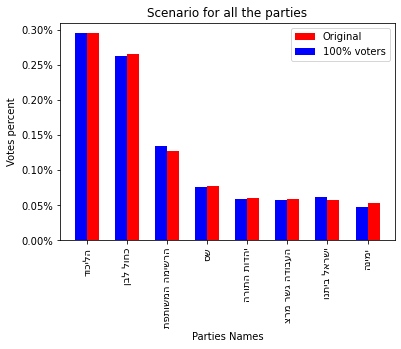

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x157e97c8490>)

In [9]:
df_2020_raw = pd.read_csv("votes per city 2020.csv", encoding = 'iso-8859-8', index_col='שם ישוב')
df_2020_new=df_2020_raw.drop(['סמל ועדה','סמל ישוב','מצביעים','Unnamed: 37'],axis=1)
dict_party = {'מחל':'הליכוד','פה':'כחול לבן','ודעם':'הרשימה המשותפת','שס':'שס','ג':'יהדות התורה','אמת':'העבודה גשר מרצ','ל':'ישראל ביתנו','טב':'ימינה'}
def nipoach(df,d):
    width = 0.3 
    names = d.keys()
    all_voters =  df.iloc[:,0:1]
    kosher = df.iloc[:,2:3]
    rev_names = [d[name][::-1] for name in list(names)]
    n=len(rev_names)
    city_votes = df[df.columns[3:df.shape[1]]].sum().div( df[df.columns[3:df.shape[1]]].sum().sum()) #computimg the original voting
    city_votes = city_votes[names] # show only the top eight parties
    city_votes_100=[0]*len(df.iloc[0][3:])
    # for each settelment the for loop compute
    # the ratio between all voters and the "kosher" votes multiplay it by the settelment votes distribution
    for i in range(0,len(df.index)): 
        j = (df.iloc[i][3:]*int(all_voters.iloc[i]))/int(kosher.iloc[i]) 
        city_votes_100=city_votes_100+j
        
    city_votes_100=city_votes_100.div(city_votes_100.sum())
    city_votes_100=city_votes_100[names] # show only the top eight parties
    fig, ax = plt.subplots()
    
    city_bar = ax.bar(np.arange(n), list(city_votes_100), width, color='b')
    city_bar_100 = ax.bar(np.arange(n)+width, list(city_votes), width, color='r')
    
    ax.set_ylabel('Votes percent')
    y_value=['{:,.2f}'.format(x) + '%' for x in ax.get_yticks()]
    ax.set_yticklabels(y_value) 
    ax.set_xlabel('Parties Names')
    ax.set_title('Scenario for all the parties')
    ax.set_xticks(np.arange(n)+0.15)
    ax.set_xticklabels(rev_names,rotation=90)
    ax.legend((city_bar_100[0], city_bar[0]), ("Original",'100% voters'))
    plt.show()

    return fig, ax 

nipoach(df_2020_new,dict_party)

#### Answer artical C:
In order to estimate a voting rate of the party by supporters, we first need to estimate the total number of supporters.<br>
By assuming that the voting rate in each settelment i,  ($V_i$) is equal to the voting rate in each settelment i regarding party j ($V_{ij}$) we can estimate the number of supporters for each party in settelment i ($\hat{V_{ij}} = \frac{n_{ij}}{v_i}$), where $n_{ij}$ is the number of voters for party j in settelment i.<br>
Then, we can sum all the votes to the party and divide by the sum of all the settlements estimatd number of potential voters and get the estimation of voting rate from supporters which is about ~70%

Regarding the question what would heppend if to voting percent would be 100%:<br>
In that scenario, the Likud voting rate will be 29.59% (estimated by dividing the estimation of the parties supporters by the total of eligible votesrs).<br>
This isn't a major diffence from the actual voteing rate for the party (which is about 29.46%), yet the Likud remains is the largest party in the country. 

#### Artical D

In [10]:
import os
print(os.getcwd())

C:\Users\Itay Hadash\Desktop\itayhadash\statlab\orzuk_data\ElectionsDataAnalysis


In [11]:

def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

social_rate =pd.read_excel('eshkol_hevrati_calcali.xlsx', encoding = 'iso-8859-8')
votes_per_city  = pd.read_csv("votes per city 2020.csv", encoding = 'iso-8859-8')
district = pd.read_excel('district.xlsx',encoding = "iso-8859-8")

district = district.iloc[:,[12,11,10,9]]
district.rename(columns={"סמל היישוב":"סמל ישוב"}, inplace=True)
district.rename(columns={"שם יישוב":"שם ישוב"}, inplace=True)
social_rate.rename(columns={'name':'שם ישוב'}, inplace=True)
social_rate.rename(columns={"set_code":"סמל ישוב"}, inplace=True)

merged_social = pd.merge(votes_per_city,social_rate ,how='inner', on='סמל ישוב') 
merged_geo =pd.merge(votes_per_city,district,how='inner', on='סמל ישוב') 
merged_social = merged_social.set_index("שם ישוב_x")
merged_geo = merged_geo.set_index("שם ישוב_x")

In [12]:
pip1 = merged_social.loc[:,["בזב","מצביעים","פסולים","כשרים","מחל","eco_level"]]
pip2 = merged_geo.loc[:,["בזב","מצביעים","פסולים","כשרים","מחל","נפה"]]
pip3 = merged_geo.loc[:,["בזב","מצביעים","פסולים","כשרים","מחל","מחוז"]]

In [13]:
x_pos = np.arange(10)
vote_percent_social = []
vote_social=[]
for i in range(1,11,1):
    t = pip1[pip1.eco_level ==i]
    np = t.iloc[:,0].sum()
    p = t.iloc[:,4].sum()/(t.iloc[:,3].sum())
    vote_percent_social.append(p)
    vote_social.append(np)

vote_percent_napa =[]
vote_napa = []
for i in pip2.iloc[:,5].unique():
    t = pip2[pip2.iloc[:,5] == i]
    np = t.iloc[:,0].sum()
    p = t.iloc[:,4].sum()/(t.iloc[:,3].sum())
    vote_percent_napa.append(p)
    vote_napa.append(np)
  
    
vote_percent_district =[]
vote_district =[]
for i in pip3.iloc[:,5].unique():
    t = pip3[pip3.iloc[:,5] == i]
    np = t.iloc[:,0].sum()
    p = t.iloc[:,4].sum()/(t.iloc[:,3].sum())
    vote_percent_district.append(p)
    vote_district.append(np)
    

napa_list = list(pip2.iloc[:,5].unique())
district_list =list(pip3.iloc[:,5].unique())
napa_list_rev =[str(i)[::-1] for i in napa_list]    
vote_social = pd.DataFrame(vote_social,columns=["מספר מצביעים לפי אשכול חברתי"],index= ["1","2","3","4","5","6","7","8","9","10"])
vote_napa = pd.DataFrame(vote_napa,columns=["מספר מצביעים לפי נפה"],index= napa_list)
vote_district = pd.DataFrame(vote_district,columns=["מספר מצביעים לפי מחוז"],index= district_list)

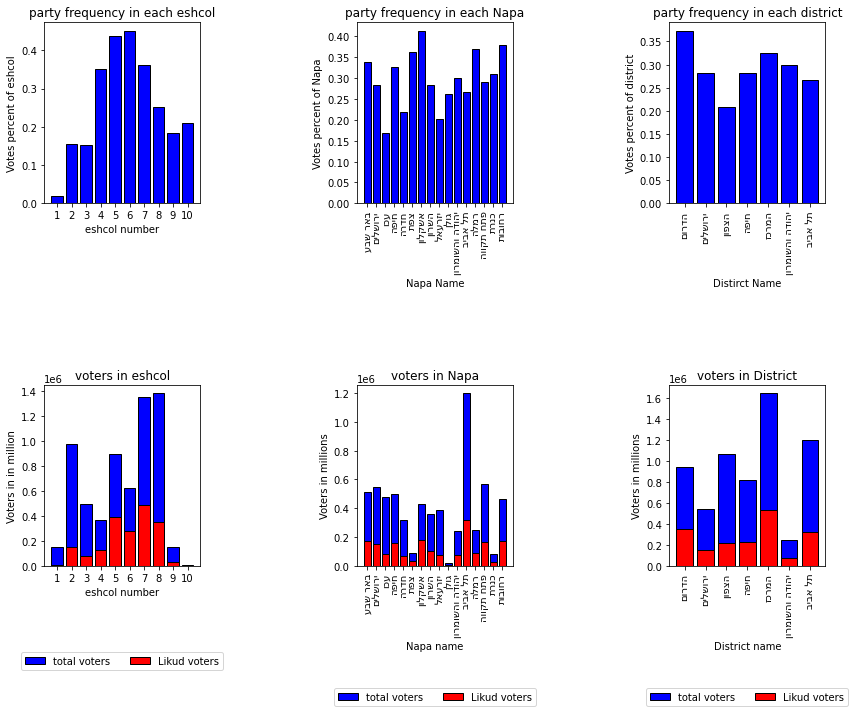

In [14]:
import numpy as np
fig,ax = plt.subplots(2,3,figsize=(14,10))
plt.subplots_adjust(hspace=1,wspace =1)
ax[0,0].bar(np.arange(10),vote_percent_social, color='b',edgecolor ="black")
ax[0,0].set_ylabel('Votes percent of eshcol')
ax[0,0].set_xlabel('eshcol number')
ax[0,0].set_title('party frequency in each eshcol')
ax[0,0].set_xticks(x_pos)
ax[0,0].set_xticklabels(["1","2","3","4","5","6","7","8","9","10"])
ax[0,1].bar(np.arange(16),vote_percent_napa, color='b',edgecolor ="black")
ax[0,1].set_ylabel('Votes percent of Napa')
ax[0,1].set_xlabel('Napa Name')
ax[0,1].set_title('party frequency in each Napa')
ax[0,1].set_xticks(np.arange(16))
ax[0,1].set_xticklabels(napa_list_rev,rotation=90)
ax[0,2].bar(np.arange(7),vote_percent_district, color='b',edgecolor ="black")
ax[0,2].set_ylabel('Votes percent of district')
ax[0,2].set_xlabel('Distirct Name')
ax[0,2].set_title('party frequency in each district')
ax[0,2].set_xticks(np.arange(7))
ax[0,2].set_xticklabels([i[::-1] for i in list(pip3.iloc[:,5].unique())],rotation = 90)
ax[1,0].bar(np.arange(10),vote_social.iloc[:,0], color='b',edgecolor ="black",label="total voters")
ax[1,0].bar(np.arange(10),list(vote_percent_social*np.array(vote_social.iloc[:,0])),color="r",edgecolor ="black",label="Likud voters")
ax[1,0].set_ylabel('Voters in in million')
ax[1,0].set_xlabel('eshcol number')
ax[1,0].set_title('voters in eshcol')
ax[1,0].set_xticks(np.arange(10))
ax[1,0].set_xticklabels(["1","2","3","4","5","6","7","8","9","10"])
ax[1,0].legend(loc="lower center",bbox_to_anchor=(0.5, -0.6), ncol=2)
ax[1,1].bar(np.arange(16),vote_napa.iloc[:,0], color='b',edgecolor ="black",label="total voters")
ax[1,1].bar(np.arange(16),list(vote_percent_napa*np.array(vote_napa.iloc[:,0])),color="r",edgecolor ="black",label="Likud voters")
ax[1,1].set_ylabel('Voters in millions')
ax[1,1].set_xlabel('Napa name')
ax[1,1].set_title('voters in Napa')
ax[1,1].set_xticks(np.arange(16))
ax[1,1].set_xticklabels(napa_list_rev,rotation=90)
ax[1,1].legend(loc="lower center",bbox_to_anchor=(0.5, -0.8), ncol=2)
ax[1,2].bar(np.arange(7),vote_district.iloc[:,0], color='b',edgecolor ="black",label="total voters")
ax[1,2].bar(np.arange(7)
            ,list(vote_percent_district*np.array(vote_district.iloc[:,0])),color="r",edgecolor ="black",label="Likud voters")
ax[1,2].set_ylabel('Voters in millions')
ax[1,2].set_xlabel('District name')
ax[1,2].set_title('voters in District')
ax[1,2].set_xticks(np.arange(7))
ax[1,2].set_xticklabels([i[::-1] for i in list(pip3.iloc[:,5].unique())],rotation = 90)
ax[1,2].legend(loc="lower center",bbox_to_anchor=(0.5, -0.8), ncol=2)
plt.show()



#### Answer for artical D:
For the analysis of artical D we wanted to see the frequency of the party's votes in each settelment,  divided by thier socioeconomic status.<br>
It turns out that more than 40% of the voteing population in socioeconomic rate 5 and 6 are voting for the Likud party.<br>
Moreover, in the score of 4 and 7 in the socioeconomic rate, the party holds the support of more than 30% of the voting population.
By looking in the population of voters in each socioeconomic rate that most of the voters belong to socioeconomic rate 7 and 8, meaning means that the Likud party should focus it's campaign aiming those potential voters.

Also, we apllied a frequency of the party's votes in each settelment, divided by thier geographical location<br>.
Again, it turns out that the party gain high support,  more than 35% of the voting population of the south voted for the Likud party compared to the 30% it gained in the center area.<br>
By looking at the population of voters in each district we can see that although the party enjoys wide support in the south,<br>
yet the majority of votes goes to the other parties (probably due to arab voters). Having said that, based on the fact that the party has many potential voters, even a small improvment in voting percent can make a difference.

#### Artical E:

In [15]:
# importing the data and organize it
df_ballots2020 = pd.read_csv("votes per ballot 2020.csv", encoding = 'iso-8859-8', index_col='שם ישוב')
df_ballots2020 = df_ballots2020.drop('מעטפות חיצוניות')
semel = df_ballots2020.loc[:,"סמל ישוב"]
df_ballots2020 = df_ballots2020.iloc[:,10:]


df_votes_norm = df_ballots2020.T.drop('זץ')
df_votes_norm = pd.DataFrame(sklearn.preprocessing.normalize(df_votes_norm,axis=0),index=df_votes_norm.index,columns=df_votes_norm.T.index)
df_ballots2020 = df_ballots2020.set_index(semel) 
pca3 = PCA(n_components=29)
XN2_pca=pca3.fit_transform(df_votes_norm.T)
ddf= pd.DataFrame([XN2_pca[:,0],XN2_pca[:,1]],index=["PC1","PC2"],columns=df_votes_norm.columns)
ddf = ddf.T
ddf["city"]=ddf.index
labels = {str(i): f"PC {i+1}" for i in range(2)}
labels['color'] = "vote %"

fig = px.scatter(ddf, x="PC1", y="PC2",color=(votes_per_ballots_likud.loc[:,"מחל"]/(votes_per_ballots_likud.loc[:,"כשרים"])),labels=labels,hover_name="city")
fig.update_layout(title='Election ballots PCA')
fig.show()


In [16]:
df_ballots2019b = pd.read_csv("votes per ballot 2019b.csv", encoding = 'iso-8859-8', index_col=["סמל ישוב","קלפי"])
df_ballots2019a = pd.read_csv("votes per ballot 2019a.csv", encoding = 'iso-8859-8', index_col=["סמל ישוב","קלפי"])
df_ballots2020 = pd.read_csv("votes per ballot 2020.csv", encoding = 'iso-8859-8', index_col=["סמל ישוב","קלפי"])
merged_ballots2019a_b = df_ballots2019a.join(df_ballots2019b,lsuffix=" 2019a",rsuffix=" 2019b",how="inner")
merged_ballots19to20 = merged_ballots2019a_b.join(df_ballots2020,lsuffix="2019b",rsuffix=" 2020",how="inner")

In [17]:
diff1 = (merged_ballots19to20.loc[:,"מחל 2019b"]/merged_ballots19to20.loc[:,"כשרים 2019b"]) - (merged_ballots19to20.loc[:,"מחל 2019a"]/merged_ballots19to20.loc[:,"כשרים 2019a"])
diff2 =(merged_ballots19to20.loc[:,"מחל"]/merged_ballots19to20.loc[:,"כשרים"]) - (merged_ballots19to20.loc[:,"מחל 2019b"]/merged_ballots19to20.loc[:,"כשרים 2019b"])

In [18]:
df_ballots2019bj=merged_ballots19to20.iloc[:,57:89]
df_ballots2019bj = df_ballots2019bj.set_index(merged_ballots19to20.loc[:,"שם ישוב 2019b"])
df_ballots2019bj = df_ballots2019bj.T
df_ballots2019bj_norm = pd.DataFrame(sklearn.preprocessing.normalize(df_ballots2019bj,axis=0),index=df_ballots2019bj.index,columns=df_ballots2019bj.T.index)
df_ballots2019bj_norm
pca4 = PCA(n_components=32)
XN3_pca=pca4.fit_transform(df_ballots2019bj_norm.T)
ddf2= pd.DataFrame([XN3_pca[:,0],XN3_pca[:,1]],index=["PC1","PC2"],columns=df_ballots2019bj_norm.columns)
ddf2= ddf2.T
ddf2["city"]=ddf2.index
labels2 = {str(i): f"PC {i+1}" for i in range(2)}
labels2['color'] = "diff %"


fig = make_subplots(rows=1, cols=2,shared_yaxes=True,subplot_titles=("Change in support 2019a-2019b","Change in support 2019b-2020"))

fig.add_trace(
    go.Scatter(x=ddf2.loc[:,"PC1"], y=ddf2.loc[:,"PC2"], mode='markers', text=ddf2.city, marker=dict(
        color=diff1,coloraxis="coloraxis")),
    row=1, col=1)

fig.add_trace(
    go.Scatter(x=ddf2.loc[:,"PC1"], y=ddf2.loc[:,"PC2"],mode='markers',text=ddf2.city,marker=dict(color=diff2,coloraxis="coloraxis")),
    row=1, col=2)

fig.update_xaxes(title_text="PC1", row=1, col=1)
fig.update_xaxes(title_text="PC1", row=1, col=2)
fig.update_yaxes(title_text="PC2", row=1, col=1)
fig.update_layout(height=600, width=800, title_text="Change in support 2019-2020 Likud",coloraxis=dict(colorscale='Bluered_r'), showlegend=False)
fig.show()

#### Answer:
For our pca analysis we used pltoly to add to the plot the location of the ballot.<br>
if we move across the PC1 axis, we can notice that most of the settelments that located "further" on the axis are arab settelment and if we move across the PC2 axis, we can notice that settelment that have a higher Y value are settelments that have higher socioeconomic status.<br>
therefore, we can assume that the two PC's are socioeconomic status and population type.<br>
In our first PCA plot we colored each ballots by percent of votes to the Likud party.<br>
If we look at the settelmets that have the highest voteing rate to the Likud party we can see that most of them are geographical periphery with low socioeconomic status.<br>
Also we can notice that some ballots can be in the same city but have different voteing rate to the Likud party(like Tel aviv).<br>
We assume that those ballots are located in the south which tends to vote for the Likud party.<br>

Moreover, from the analysis of change of support to the party we can see that there is no difference in the voting rate to the party<br>
between the 2019 april and the 2019 september elections.<br>
However,between the 2019 september and the 2020 elections we can see that an improvement in voteing rate to the party in the ballots that according to our first analysis had  highest voteing rate to the Likud party

#### artical F+G

In [27]:
names2020=["ליכוד","כחול לבן","הרשימה המשותפת","שס","ישראל ביתנו","יהדות התורה","ימינה","עבודה גשר מרצ","עוצמה יהודית","לא הצביעו"]
names2019b = ["ליכוד","כחול לבן","הרשימה המשותפת","שס","יהדות התודה","ימינה","העבודה גשר","מרצ","ישראל ביתנו","עוצמה יהודית","לא הצביעו"]
names2019a = ["הליכוד","כחול לבן","רעם-תעל","חדש-בלד","שם","ישראל ביתנו","יהדות התורה","איחוד הימין",
              "העבודה","מרצ","כולנו","הימין החדש","זהות","גשר","לא הצביעו"]
# Create heatmap
def heatmap_M(M_hat, namesa,namesb,title,ylab,year1,year2,bool=False):
    rev_names_a = [i[::-1] for i in list(namesa)]
    rev_names_b = [i[::-1] for i in list(namesb)]
    fig, ax = plt.subplots(figsize = (10,10))
    im = ax.imshow(M_hat, cmap=plt.get_cmap('viridis'))
    n = M_hat.shape[0]  # get number of variables 
    m = M_hat.shape[1]
    ax.set_xticks(np.arange(m))
    ax.set_yticks(np.arange(n))
    ax.set_ylabel('Elections'+str(year1))
    ax.set_xlabel('Elections '+str(year2))
    ax.set_xticklabels(rev_names_b,rotation=90)
    ax.set_yticklabels(rev_names_a)
    ax.set_title(title)
    if bool == False:
        for i in range(M_hat.shape[0]):
            for j in range(M_hat.shape[1]):
                text = ax.text(j, i, round(M_hat.iloc[i, j], 3), ha="center", va="center", color="w")
    cbar = ax.figure.colorbar(im, ax=ax) 
    cbar.ax.set_ylabel(ylab, rotation=-90, va="bottom")

    

def nnls_mat(prev,aft):
    M_hat_nnls = []
    for i in range(len(aft.columns)):
        N_b_1 = aft.iloc[:,i]
        M_hat_nnls.append(sc.optimize.nnls(prev,N_b_1)[0])
    
    return(pd.DataFrame(M_hat_nnls))   
    
    
    
def bootstrap_sd(perv,aft,B):
    M_hat_sum = np.zeros((perv.shape[1],aft.shape[1]))
    M_hat_sum2 = np.zeros((perv.shape[1],aft.shape[1])) 
    for i in range(B):
        bal = np.random.randint(aft.shape[0], size=aft.shape[0])
        perv2 =perv.iloc[bal,:]
        aft2=aft.iloc[bal,:]
        M_hat=nnls_mat(perv2,aft2).T
        M_hat_sum = M_hat_sum + np.array(M_hat)
        M_hat_sum2 = M_hat_sum2 + np.array(M_hat)**2
    
    return np.sqrt(M_hat_sum2/B - (M_hat_sum/B)**2).T


 

In [28]:
data_boharim = merged_ballots19to20.loc[:,["פסולים 2019a","כשרים 2019a","בזב 2019a","פסולים 2019b","כשרים 2019b","בזב 2019b","פסולים","כשרים","בזב"]]

## ckeck problem whith jewish power
N_a_b = merged_ballots19to20.loc[:,["מחל 2019b","פה 2019b","ודעם2019b",
                                    "שס 2019b","ג 2019b","טב 2019b","אמת 2019b","מרצ 2019b","ל 2019b","כף"]]
N_b_b = merged_ballots19to20.loc[:,["מחל","פה","ודעם 2020","שס","ל","ג","טב","אמת","נץ"]]
N_b_c = merged_ballots19to20.loc[:,["מחל 2019a","פה 2019a","דעם","ום","שס 2019a","ל 2019a"
                                    ,"ג 2019a","טב 2019a","אמת 2019a","מרצ 2019a","כ 2019a","נ 2019a","ז 2019a","נר"]]

dict_partya = {'מחל 2019':'הליכוד','פה 2019':'כחול לבן','ודעם 2019':'הרשימה המשותפת','שס 2019':'שס','ג 2019':'יהדות התורה',
              'אמת 2019':'העבודה גשר','ל 2019':'ישראל ביתנו','טב 2019':'ימינה', 'נץ 2019':'עוצמה יהודית', 'מרצ':'המחנה הדמוקרטי',"לא הצביעו":"לא הצביע"}

dict_partyb = {'מחל 2020':'הליכוד','פה 2020':'כחול לבן','ודעם 2020':'הרשימה המשותפת','שס 2020':'שס','ג 2020':'יהדות התורה',
              'אמת 2020':'העבודה גשר מרצ','ל 2020':'ישראל ביתנו','טב 2020':'ימינה', 'נץ 2020':'עוצמה יהודית',"לא הצביעו":"לא הצביעו"}

N_a_b["לא הצביעו"] = data_boharim["בזב 2019b"] - data_boharim["כשרים 2019b"] - data_boharim["פסולים 2019b"]
N_b_b["לא הצביעו"] = data_boharim["בזב"] - data_boharim["כשרים"] - data_boharim["פסולים"]
N_b_c["לא הצביעו"] = data_boharim["בזב 2019a"] - data_boharim["כשרים 2019a"] - data_boharim["פסולים 2019a"]


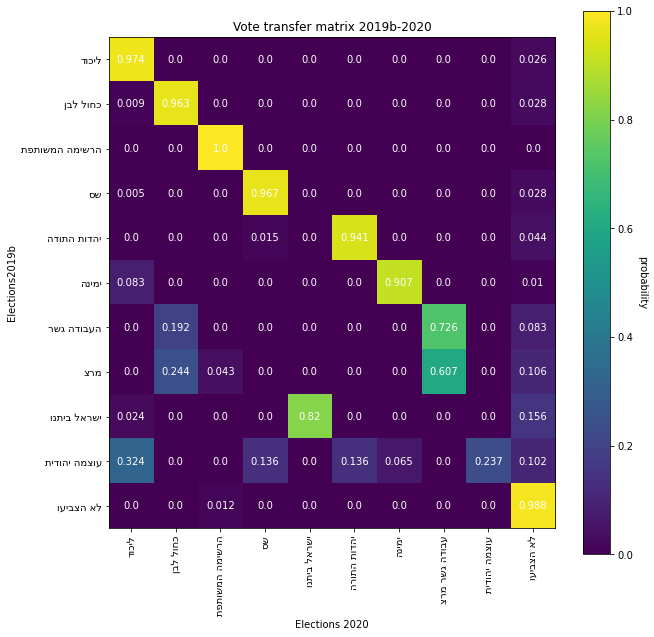

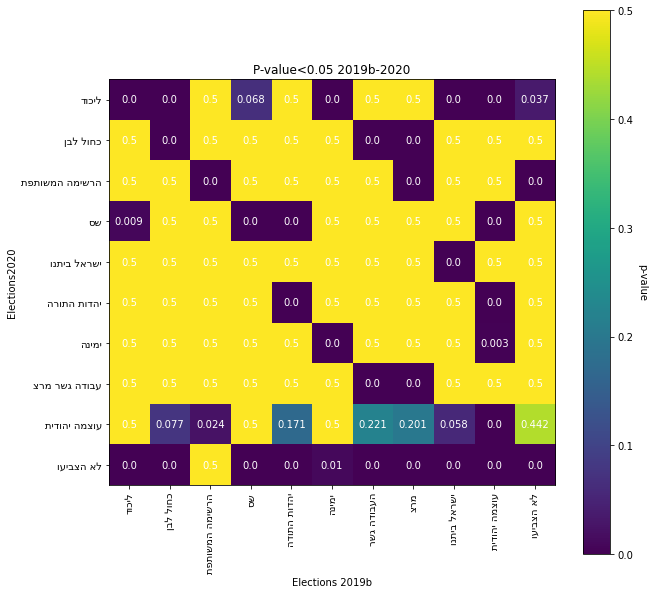

In [29]:

M_hat_new=nnls_mat(N_a_b,N_b_b).T
M = np.array(M_hat_new)
M_hat_new[M_hat_new < 0.005]=0
M_hat_norm_new =pd.DataFrame(preprocessing.normalize(M_hat_new,axis=1,norm="l1"),index=M_hat_new.index,columns=M_hat_new.T.index)
M_hat_norm_new.columns = ["מחל 2020","פה 2020",
                                         "ודעם 2020","שס 2020","ג 2020","אמת 2020","ל 2020","ימינה 2020","נץ 2020","לא הצביעו"]

heatmap_M(M_hat_norm_new,names2019b,names2020,"Vote transfer matrix 2019b-2020","probability","2019b","2020")

# mse1=np.mean(np.power((np.matmul(np.array(N_a_b),M) - np.array(N_b_b)),2),axis=0)
#sd_mat = np.array([np.sqrt(i*np.linalg.inv(np.matmul(np.array(N_a_b.T),np.array(N_a_b))).diagonal()) for i in mse1])
sd_mat =bootstrap_sd(N_a_b,N_b_b,100)
sd_mat[sd_mat==0]=0.0000001
t_statistic = np.array([M[:,i]/sd_mat[i] for i in range(10)])
p_val = stats.t.cdf(-t_statistic, N_a_b.shape[0]-N_b_b.shape[1])
heatmap_M(pd.DataFrame(p_val),names2020,names2019b,"P-value<0.05 2019b-2020","p-value","2020","2019b")

total_votes_2019b = df_ballots2019b
total_votes_2019b["לא הצביעו"] = total_votes_2019b.loc[:,"בזב"] - total_votes_2019b.loc[:,"כשרים"] - total_votes_2019b.loc[:,"פסולים"]
total_votes_2019b =total_votes_2019b.loc[:,["מחל","פה","ודעם","שס","ג","טב","אמת","מרצ","ל","כף","לא הצביעו"]]


lab2 = ["likud 2019b","blue&white 2019b","joint list 2019b","shas 2019b","israel bitano 2019b","yehadoot hatora 2019b"
       ,"yamina 2019b","labor-gesher 2019b","merez 2019b","otzma yehoodit 2019b","none voters 2019b","likud 2020"
       ,"blue&white 2020","joint list 2020","shas 2020","israel bitano 2020"
       ,"yehadoot hatora 2020","yamina 2020","labor-gesher-meretz 2020","otzma yehoodit 2020","none voters 2020"]
mm1=M_hat_norm_new
mm1.iloc[1:,1:]=0
mm1_prob =mm1
mm1.iloc[:,0] = mm1.iloc[:,0]*np.array(total_votes_2019b.sum())
mm1.loc[:,"שס 2020"] = mm1.loc[:,"שס 2020"]*np.array(total_votes_2019b.sum())
mm1.loc[:,"לא הצביעו"] = mm1.loc[:,"לא הצביעו"]*np.array(total_votes_2019b.sum())
mm2=[]
for i in range(11):
    t=list(mm1.iloc[i,:])
    for j in t:
        mm2.append(round(j,3))
        
        
# samky plot for matrix b(with none voters)
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = lab2,
      color = ["red","blue","green","orange","lightgreen","yellow","purple","pink","brown","cyan","darkgreen",
              "red","blue","green","orange","lightgreen","yellow","purple","pink","cyan","darkgreen"]
    ),
    link = dict(
      source = [0,0,1,6,9,4], ## fix the sanky plot!!! by the order
      target = [11,20,11,11,11,11],
      value = [i for i in mm2 if i != 0],
      color = ["red","red","blue","purple","cyan","lightgreen"],
        label =[i for i in mm2 if i != 0], 
    
  ))])

fig.update_layout(title_text="Estimated vote trasfer 2019b-2020 significant", font_size=10)
fig.show()

## fix the sanky plot!!!

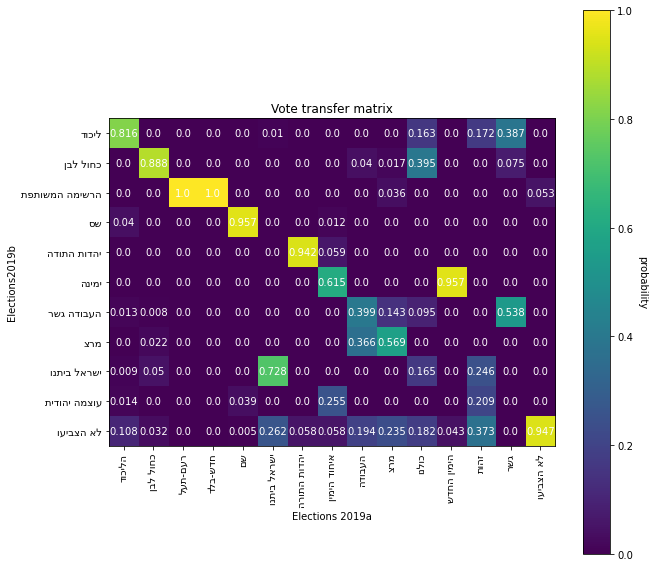

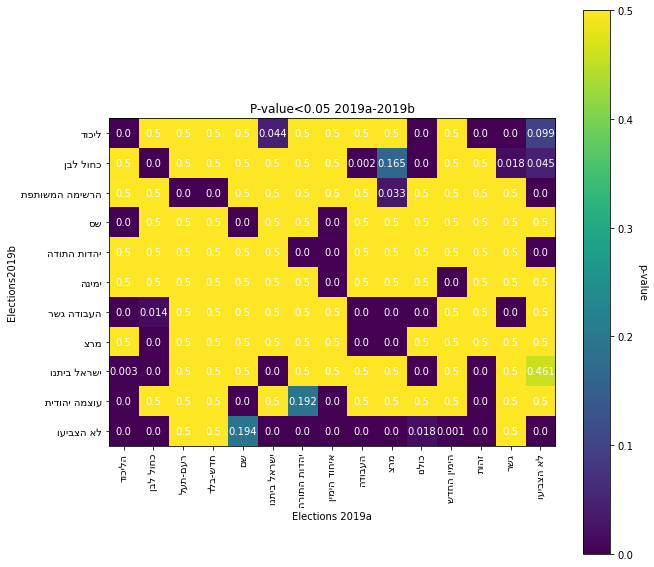

In [22]:

M_hat_old = nnls_mat(N_b_c,N_a_b).T
M_old = np.array(M_hat_old)
M_hat_old[M_hat_old < 0.005]=0
M_hat_norm_old =pd.DataFrame(preprocessing.normalize(M_hat_old,axis=1,norm="l1"),index=M_hat_old.index,columns=M_hat_old.T.index)

M_hat_norm_old.columns =["מחל 2019b","פה 2019b"
                         ,"ודעם 2019b","שס 2019b","ג 2019b","טב 2019b","אמת 2019b","מרצ 2019b","ל 2019b","כף","לא הצביעו"]
heatmap_M(M_hat_norm_old.T,names2019b,names2019a,"Vote transfer matrix","probability","2019b","2019a")

# mse2=np.mean(np.power((np.matmul(np.array(N_b_c),M_old) - np.array(N_a_b)),2),axis=0)
# #sd_mat2 = np.array([np.sqrt(i*np.linalg.inv(np.matmul(np.array(N_b_c.T),np.array(N_b_c))).diagonal()) for i in mse2])
sd_mat2 = bootstrap_sd(N_b_c,N_a_b,100)
sd_mat2[sd_mat2==0]=0.00000001
t_statistic2 = np.array([M_old[:,i]/sd_mat2[i] for i in range(11)])
p_val2 = stats.t.cdf(-t_statistic2, N_b_c.shape[0]-N_a_b.shape[1])
heatmap_M(pd.DataFrame(p_val2),names2019b,names2019a,"P-value<0.05 2019a-2019b","p-value","2019b","2019a")

lab1 =["likud 2019a","blue&white 2019b","raham-tahal","hadash-balad",
       "shas 2019a","israel bitano 2019a","yehadoot hatora 2019a",
       "jewish home","labor 2019a","meretz 2019a","culanu",
       "new right","zehut","gesher 2019a","none voters 2019a",
       "likud 2019b","blue&white 2019b","joint list 2019b","shas 2019b",
       "israel bitano 2019b","yehadoot hatora 2019b"
       ,"yamina 2019b","labor-gesher 2019b","merez 2019b","otzma yehoodit 2019b","none voters 2019b"]

total_votes_2019a = df_ballots2019a
total_votes_2019a["לא הצביעו"] = total_votes_2019a.loc[:,"בזב"] - total_votes_2019a.loc[:,"כשרים"] - total_votes_2019a.loc[:,"פסולים"]
total_votes_2019a =total_votes_2019a.loc[:,["מחל","פה","דעם","ום","שס","ל","ג","טב","אמת","מרצ","כ","נ","ז","נר","לא הצביעו"]]


mm11 = M_hat_norm_old
mm11.iloc[1:,1:]=0
mm11_prob =mm11
mm11.iloc[:,0] = mm11.iloc[:,0]*np.array(total_votes_2019a.sum())
mm11.loc[:,"שס 2019b"] = mm11.loc[:,"שס 2019b"]*np.array(total_votes_2019a.sum())
mm11.loc[:,"אמת 2019b"] = mm11.loc[:,"אמת 2019b"]*np.array(total_votes_2019a.sum())
mm11.loc[:,"ל 2019b"] = mm11.loc[:,"ל 2019b"]*np.array(total_votes_2019a.sum())
mm11.loc[:,"כף"] = mm11.loc[:,"כף"]*np.array(total_votes_2019a.sum())
mm11.loc[:,"לא הצביעו"] = mm11.loc[:,"לא הצביעו"]*np.array(total_votes_2019a.sum())
mm21=[]
for i in range(15):
    t=list(mm11.iloc[i,:])
    for j in t:
        mm21.append(round(j,3))
        
# samky plot for matrix b(with none voters)
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = lab1,
      color = ["red","blue","green","green","green","green"
               ,"green","green","green","green","cyan",
               "lightgreen","lightgreen","green","blue"
               ,"red","red","red","orange","purple","red","green","green","blue","yellow","blue"]
    ),
    link = dict(
      source = [0,0,0,0,0,0,5,10,12,13], # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = [15,18,22,19,24,25,15,15,15,15],
      value = [i for i in mm21 if i != 0],
      color = ["red","red","red","red","red","red","pink","cyan","lightgreen","darkgreen"],
        label =[i for i in mm21 if i != 0], 
                 
  ))])

fig.update_layout(title_text="Estimated vote trasfer 2019a-2019b singnificant", font_size=10)
fig.show()   

## fix the sanky plot!!

#### Answer F+G
We've been asked to analize the parties vote transfer from the Likud party to other parties and vice versa.
We began our analysis by calculating the least squares sum estimator for the problem<br>
$\||N^{(a)}M-N^{(b)}\||_F\$

where $N^{(a)}$ and $N^{(b)}$ are the shared ballots votes in elections 2019a and 2019b and set it to match probablity laws.<br>
As seen in the vote transfer matrix 2019a-2019b it seems that the the Likud party has lost votes to shas,labor-gesher,israel bitano,otzma yehoodit and to none voters.<br>
as for the significance the transfers, from examinng the P-values(that were calculated by the bootsrap method) of the transfers we can see that all the parties that<br>
received votes that came from the Likud party have P-values<0.05 which makes tham significant.<br>
as for the amount of voters that change thier votes we can see that about 120k voters who where Likud voters in 2019a has became none voters in 2019b which makes it the largest recevier of votes from the Likud.
As for voters who became Likud voters in 2019b we can see that some coulanu,gesher, zehut and none voters have become Likud voters in 2019b.<br>
Form examinng the P-values of the transfers we can see that all the parties that transferd votes to the Likud party have  P-values<0.05 (except the transition of israel biatno but we decided to keep it because is very close to be significant)   which makes tham significant.<br>
as for the amount of voters that change thier votes we can see that about 28k of gesher voters in 2019a have become Likud voters in 2019b which makes it the largest tranfer of votes to the Likud.<br>
this transfer from culano to the Likud shows that the union of culano and the Likud party has not added as much votes as expected.<br>
Therefore the party need to examine future unions to guarantee vote transfer to the party.

Also, we did the same analysis for vote transfer from the 2019b-2020 elections.
As seen in the vote transfer matrix 2019b-2020 it seems that the Likud party has lost some voters only to shas party.<br>
But if we take a look the P-value we can see that the P-value of this transition is 0.08 which makes this transition not significant and therefore we can assume that the Likud party did not lose votes to shas at all.<br>
We can also see voters that became Likud voters in the 2020 election came from varied of parties.<br>
But again if we take a look at the P-values we can see that the only significant votes transfer are from blue&white,yamina,otzma yehoodit and none voters.<br>
as for the amount of voters that change thier votes we can see that about 18k of none voters in 2019b have become Likud voters in 2020 which makes it the largest tranfer of votes to the Likud.

#### artical H

In [23]:
df_merged_sub = merged_ballots19to20.loc[:,["שם ישוב 2019a","בזב 2019a","כשרים 2019a","בזב 2019b"
                                            ,"כשרים 2019b","בזב","כשרים","מחל 2019a","מחל 2019b","מחל","פסולים 2019a","פסולים 2019b","פסולים"]]

df_merged_sub["ratio 2019a"] = df_merged_sub.loc[:,"כשרים 2019a"].div(df_merged_sub.loc[:,"בזב 2019a"])
df_merged_sub["ratio 2020"] = df_merged_sub.loc[:,"כשרים"].div(df_merged_sub.loc[:,"בזב"])
df_merged_sub["ratio 2019b"] = df_merged_sub.loc[:,"כשרים 2019b"].div(df_merged_sub.loc[:,"בזב 2019b"])
df_merged_sub["mean ele"] = (df_merged_sub.loc[:,"ratio 2019a"] + df_merged_sub.loc[:,"ratio 2020"] + df_merged_sub.loc[:,"ratio 2019b"])/3
df_merged_sub["sd Likud"] = df_merged_sub.loc[:,["מחל","מחל 2019a","מחל 2019b"]].std(axis=1)
df_merged_sub.head()


ten_mean = df_merged_sub.sort_values("mean ele",ascending=False).head(10)
ten_sd = df_merged_sub.sort_values("sd Likud",ascending=False).head(10)
ten_mean_pas = ten_mean.loc[:,["פסולים 2019a","פסולים 2019b","פסולים"]]
ten_sd_pas =ten_sd.loc[:,["פסולים 2019a","פסולים 2019b","פסולים"]]
likud_mean = ten_mean.loc[:,["מחל 2019a","מחל 2019b","מחל"]]
likud_sd = ten_sd.loc[:,["מחל 2019a","מחל 2019b","מחל"]]

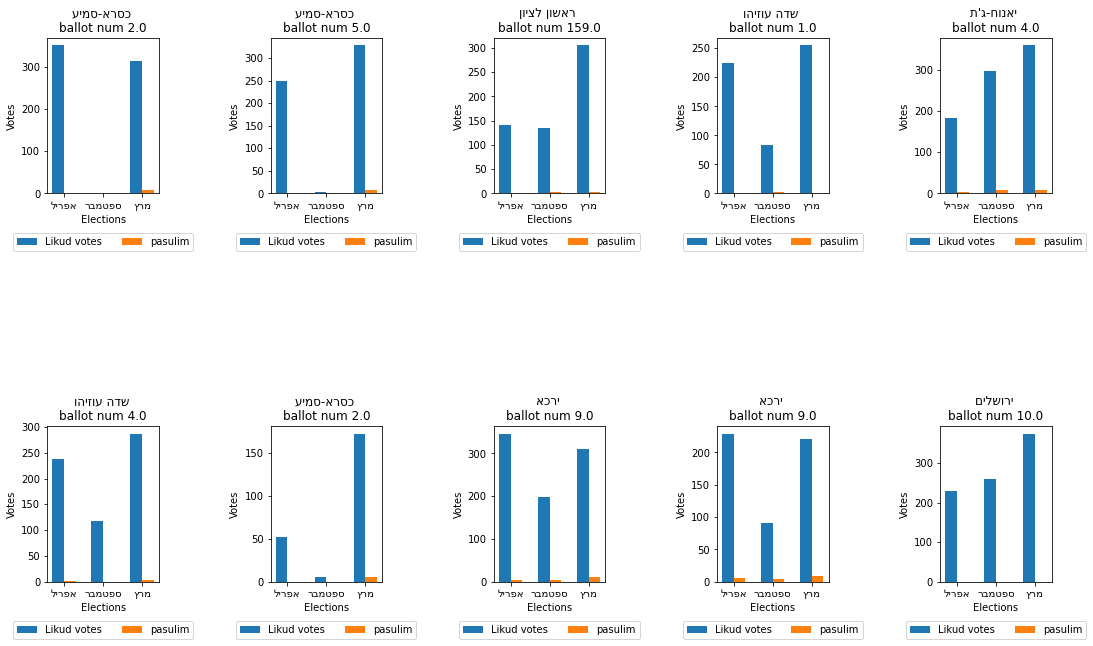

In [24]:
fig,ax=plt.subplots(2,5,figsize=(18,10))
plt.subplots_adjust(hspace =1.5,wspace =1)
width = 0.3
for i in range(0,2):
    for j in range(0,5):
        if i==0:
            ax[i,j].bar(np.arange(3)-0.15,likud_sd.iloc[j,:],width,label="Likud votes")
            ax[i,j].bar(np.arange(3)+0.15,ten_sd_pas.iloc[j,:],width,label="pasulim")
            ax[i,j].set_xticks(np.arange(3))
            ax[i,j].set_ylabel("Votes")
            ax[i,j].set_xlabel('Elections')
            ax[i,j].set_title(ten_sd.iloc[j,0][::-1]+" "+"\n"+"ballot num "+str(ten_sd.index[j][1]))
            ax[i,j].set_xticklabels([i[::-1] for i in [ "אפריל","ספטמבר","מרץ"]])
            ax[i,j].legend(loc="lower center",bbox_to_anchor=(0.5, -0.4), ncol=2)
        else:
            ax[i,j].bar(np.arange(3)-0.15,likud_sd.iloc[j+5,:],width,label="Likud votes")
            ax[i,j].bar(np.arange(3)+0.15,ten_sd_pas.iloc[j+5,:],width,label="pasulim")
            ax[i,j].set_xticks(np.arange(3))
            ax[i,j].set_ylabel("Votes")
            ax[i,j].set_xlabel('Elections')
            ax[i,j].set_title(ten_sd.iloc[j+5,0][::-1]+" "+"\n"+"ballot num "+str(ten_sd.index[j+4][1]))
            ax[i,j].set_xticklabels([i[::-1] for i in [ "אפריל", "ספטמבר",  "מרץ"]])
            ax[i,j].legend(loc="lower center",bbox_to_anchor=(0.5, -0.4), ncol=2)
plt.show() 

#### Answer:
For this artical we assumed that if a ballot have voters for the Likud party this number of voters will not change much in a short amount of time(from one election to the other there are only a few months).<br>
Therefore we will identify a ballot as suspicious if the votes for the Likud in the past three elections in high.<br>
As we can see in our bar plots there are some ballots that have voters to the Likud in the 2019 april election and in the 2020 election but not as much(or even 0) in the 2019b september.<br>
This trend appears in some ballots in yarca, kisra-smia, and sade oziyahu.<br>
We can also see that in those ballots there are low number of invalid so this is not the reason for this change.<br>
Those ballots may affect the total voting rate for the party due to the fact that if those ballots are being manipulated other ballots can be manipulated in the same way and couse a significant decline in votes for the party and harm the democatic procces
